Importing Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Data collection and analysis:


In [3]:
# Loading the dataset:
data = pd.read_csv("C:/Users/nn474/OneDrive/Desktop/Machinelearning/insurance.csv")

In [4]:
# first 5 rows:
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [5]:
# Last 5 rows:
print(data.tail())

      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [6]:
# Number of rows and columns:
print(data.shape)

(1338, 7)


In [7]:
# Basic information about the dataset:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [8]:
# Checking for missing values:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis 

In [9]:
# Statistical summary of the dataset:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


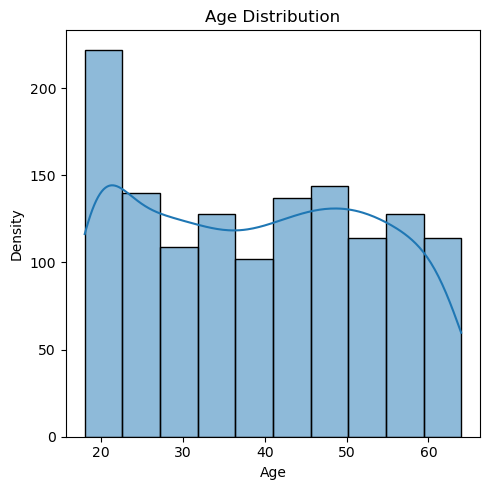

In [19]:
# The distribution of age values:
plt.figure(figsize=(5,5))
sns.histplot(data['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')       
plt.ylabel('Density')
plt.tight_layout()
plt.show()

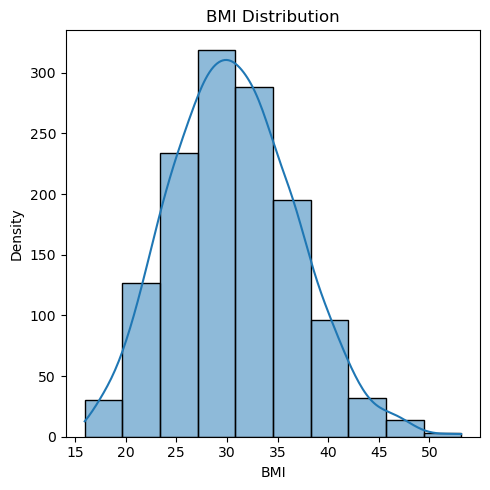

In [18]:
# The dsitribution of BMI values:
plt.figure(figsize=(5,5))
sns.histplot(data['bmi'], bins=10, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Density')   
plt.tight_layout()
plt.show()

The normal of BMI range is from 18.5 to 24.9

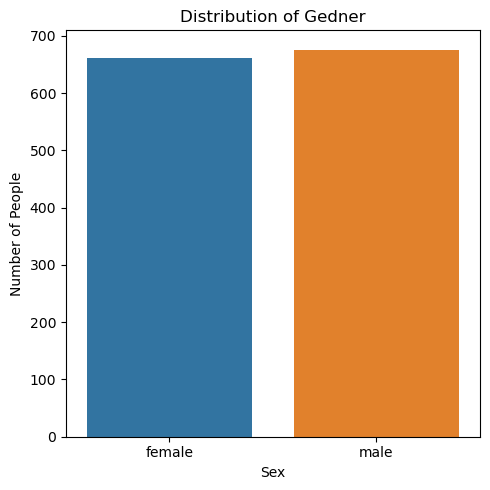

In [23]:
# distribution of Gender:
plt.figure(figsize=(5,5))
sns.countplot(x='sex', hue='sex', data=data, palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Gedner')
plt.xlabel('Sex')
plt.ylabel ('Number of People')
plt.tight_layout()
plt.show()

Distribution of children column:

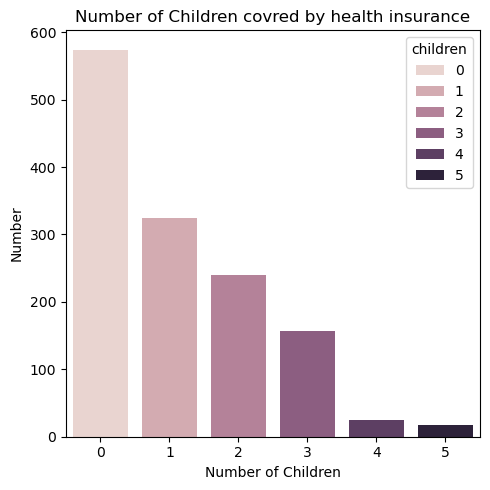

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x='children', hue = 'children', data=data)
plt.title('Number of Children covred by health insurance')
plt.xlabel('Number of Children')
plt.ylabel('Number')
plt.tight_layout()
plt.show()


In [26]:
data['children'].value_counts()


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

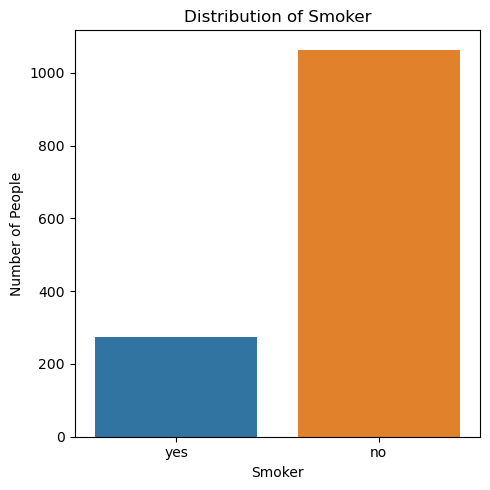

In [27]:
# The distribution of smoker:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', hue='smoker', data=data, palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Smoker')
plt.xlabel('Smoker')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

In [28]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

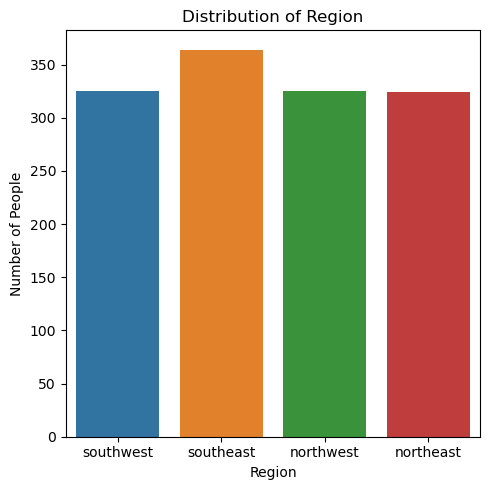

In [30]:
# The distribution of region column:
plt.figure(figsize=(5,5))
sns.countplot(x='region', hue='region', data=data)
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()


In [31]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

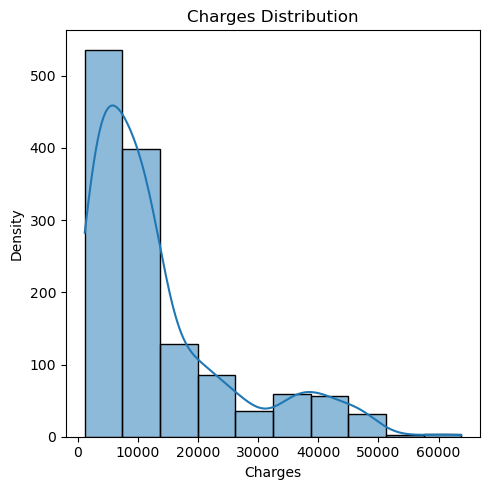

In [32]:
# Distribution of charges values:
plt.figure(figsize=(5,5))
sns.histplot(data['charges'], bins=10, kde=True)
plt.title('Charges Distribution')   
plt.xlabel('Charges')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Data Pre-Processing:


Tranforming the categorical values into numerical values:


In [36]:
# Tranforming the sex column:
data.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
data = data.infer_objects(copy=False)
# Tranforming the smoker column:
data.replace({'smoker': {'yes': 1, 'no': 0}}, inplace=True)
data = data.infer_objects(copy=False)
# Tranforming the region column:
data.replace({'region': {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}}, inplace=True)
data = data.infer_objects(copy=False)


C:\Users\nn474\AppData\Local\Temp\ipykernel_5576\3690180518.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'region': {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}}, inplace=True)


# Splitting the Features and Target:

In [38]:
# Splitting the Features and Target Variable:
X = data.drop(columns='charges', axis=1)
Y = data['charges']

In [39]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       0
1      18    0  33.770         1       0       1
2      28    0  33.000         3       0       1
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       1
1336   21    1  25.800         0       0       0
1337   61    1  29.070         0       1       2

[1338 rows x 6 columns]


In [40]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Splitting the dataset into Training and Test Set:

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [42]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(1338, 6) (1070, 6) (268, 6)
(1338,) (1070,) (268,)


# Model Training 

Linear Regression:

In [43]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

# Model Evaluation based on the Training and the Test Set:

Training Set:

R2 Score:  0.7417049283233981
Mean Absolute Error:  4208.762029186571
Mean Squared Error:  37280663.22256598
Root Mean Squared Error:  6105.789320191615
Intercept:  -12779.250821992397
Coefficients:  [2.57056264e+02 1.87914567e+01 3.35781491e+02 4.25091456e+02
 2.36478181e+04 2.71284266e+02]


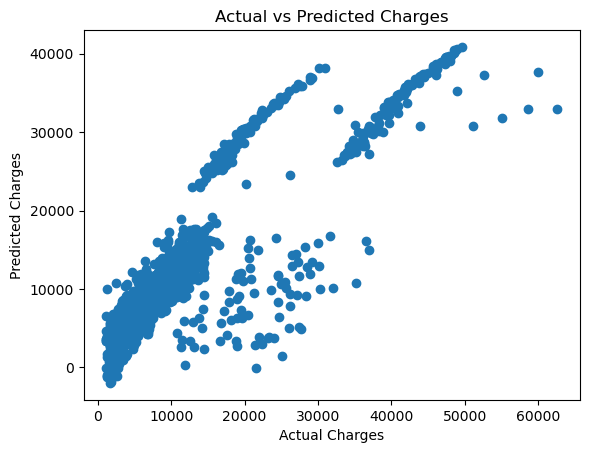

In [53]:
# Predict charge based on the training set:
training_data_prediction = model.predict(X_train)
# The accuracy of the training set:
print("R2 Score: ", r2_score(Y_train, training_data_prediction))
print("Mean Absolute Error: ", mean_absolute_error(Y_train, training_data_prediction))
print("Mean Squared Error: ", mean_squared_error(Y_train, training_data_prediction))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_train, training_data_prediction)))
if hasattr(model, 'intercept_'):
    print("Intercept: ", model.intercept_)
else:
    print("The model does not have an intercept.")

if hasattr(model, 'coef_'):
    print("Coefficients: ", model.coef_)
else:
    print("The model does not have coefficients (e.g., if no features were used).")
# Visualizing the training set prediction:      
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

Test Set:


R2 Score:  0.7833463107364539
Mean Absolute Error:  4186.508898366433
Mean Squared Error:  33635210.431178406
Root Mean Squared Error:  5799.587091438356
Intercept:  -12779.250821992397
Coefficients:  [2.57056264e+02 1.87914567e+01 3.35781491e+02 4.25091456e+02
 2.36478181e+04 2.71284266e+02]


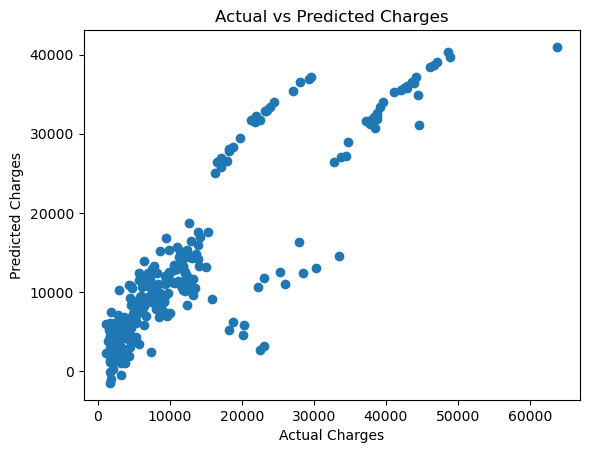

In [55]:
# Prediction on the Test Set: 
test_data_prediction = model.predict(X_test)
# The accuracy of the test set:
print("R2 Score: ", r2_score(Y_test, test_data_prediction))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, test_data_prediction))
print("Mean Squared Error: ", mean_squared_error(Y_test, test_data_prediction))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_test, test_data_prediction)))
if hasattr(model, 'intercept_'):
    print("Intercept: ", model.intercept_)
else:
    print("The model does not have an intercept.")

if hasattr(model, 'coef_'):
    print("Coefficients: ", model.coef_)
else:
    print("The model does not have coefficients (e.g., if no features were used).")
# Visualizing the test set prediction:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

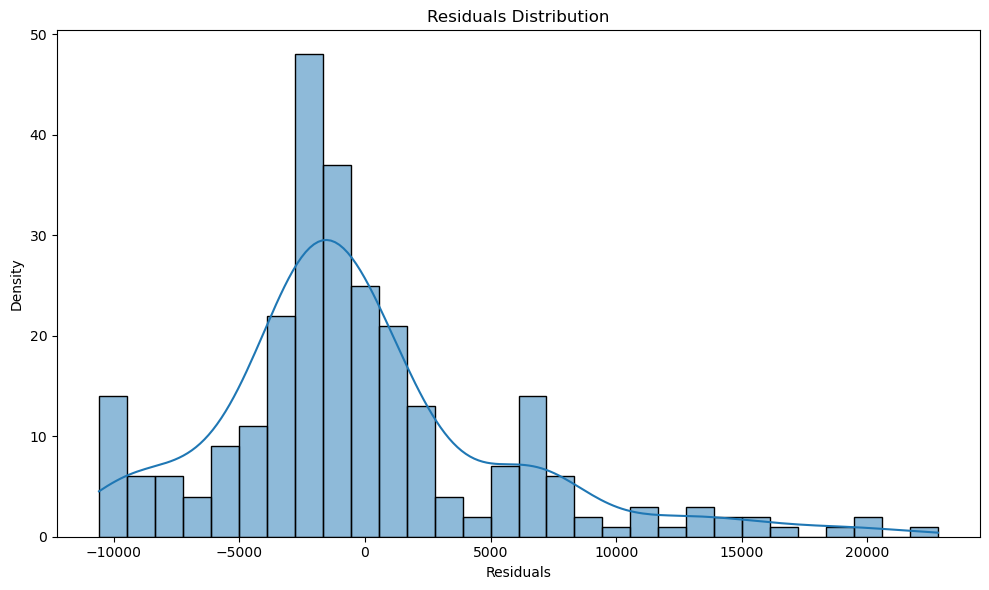

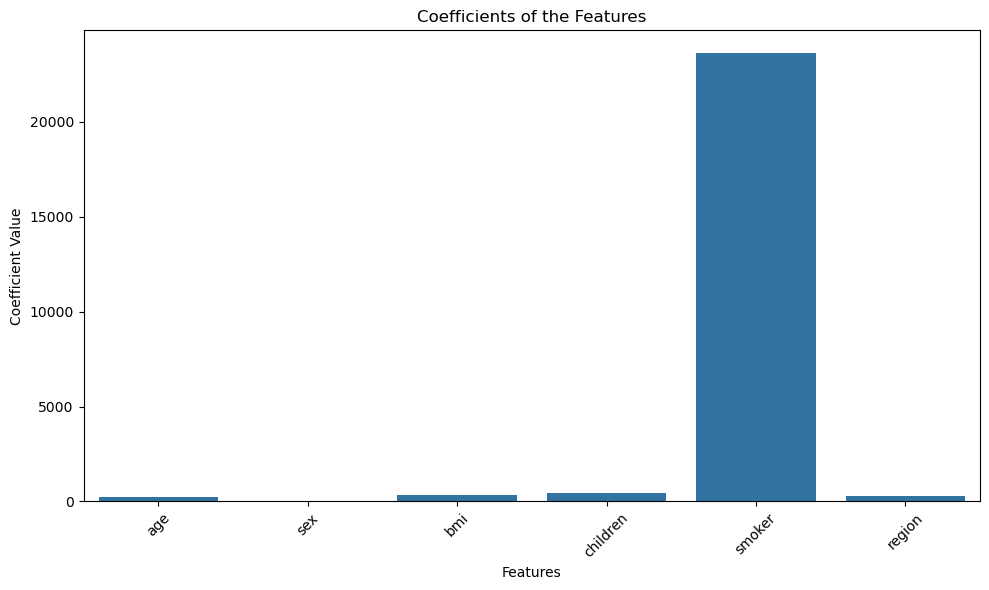

In [56]:
# Visualizing the residuals:
plt.figure(figsize=(10,6))
sns.histplot((Y_test - test_data_prediction), bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')   
plt.tight_layout()
plt.show()
# Visualizing the coefficients:
plt.figure(figsize=(10,6))
sns.barplot(x=X.columns, y=model.coef_)
plt.title('Coefficients of the Features')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Intercept : -12779.250821992397
Feature: age                       | Coefficient: 257.0563
Feature: sex                       | Coefficient: 18.7915
Feature: bmi                       | Coefficient: 335.7815
Feature: children                  | Coefficient: 425.0915
Feature: smoker                    | Coefficient: 23647.8181
Feature: region                    | Coefficient: 271.2843


C:\Users\nn474\AppData\Local\Temp\ipykernel_5576\2970908897.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Feature', x='Coefficient', data=coef_df, palette='coolwarm')


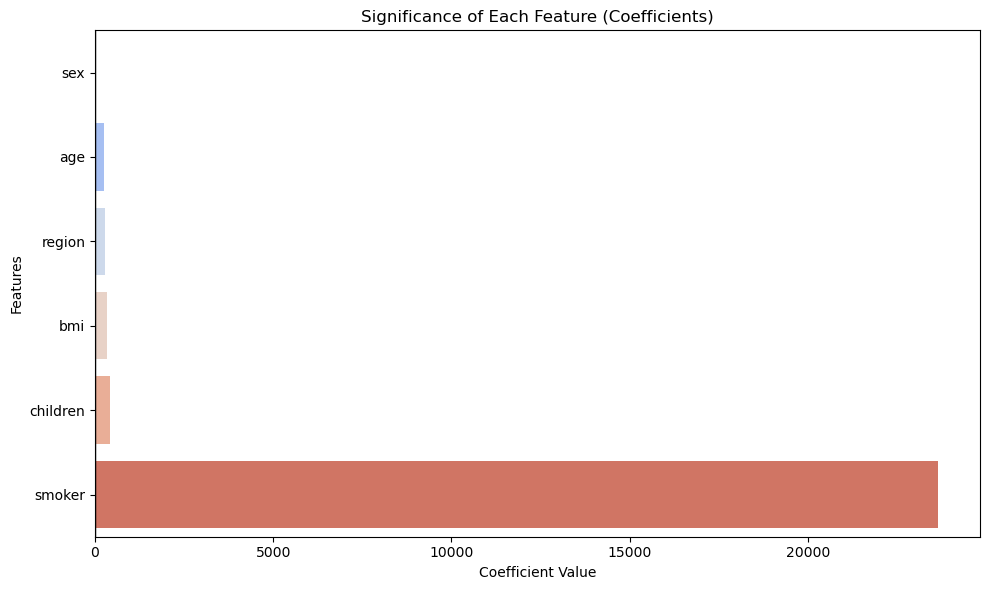

In [59]:

# In intercept (hệ số tự do)
print(f"Intercept : {model.intercept_}")

# In hệ số của từng biến
for feature, coef in zip(X.columns, model.coef_):
    print(f"Feature: {feature:25s} | Coefficient: {coef:.4f}")
# Create a dataframe for coefficients of the features:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# The comparision between the significance of coefficients: 
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=True)

# Visualisation the horizontal bar graph of coeffiecient 
plt.figure(figsize=(10, 6))
sns.barplot(y='Feature', x='Coefficient', data=coef_df, palette='coolwarm')
plt.title('Significance of Each Feature (Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.axvline(0, color='black', linewidth=1) 
plt.tight_layout()
plt.show()

# Building a predictive system:

In [62]:
input_data = (31,1,25.74,0,0,0)
# changing the data into a numpy array:
input_data_as_numpy_array = np.array(input_data)

# reshape the array: 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is UDS:', prediction[0])

[3851.30038588]
The insurance cost is UDS: 3851.3003858781285


c:\Users\nn474\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
